In [44]:
import numpy as np
import matplotlib.pyplot as plt
import math

## 2

$$\dfrac{\partial T}{\partial t} = \dfrac{\partial ^2 T}{\partial x^2}$$

Transform PDE into $N$ coupled ODE's
$$\dfrac{d T_i}{dt}=\dfrac{T_{i-1}-2T_i+T_{i+1}}{(\Delta x)^2}$$

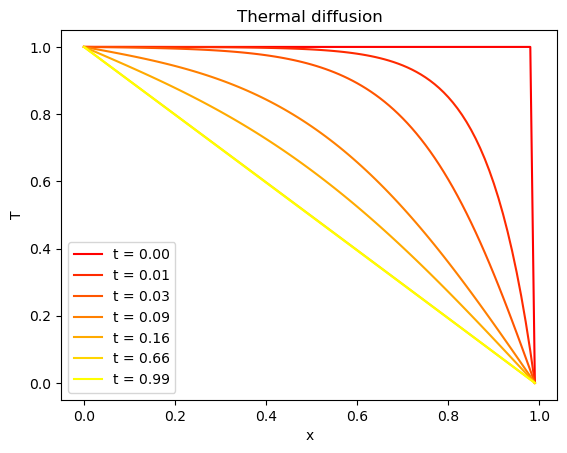

In [101]:
# Construct C matrix

N = 100   # number of gridpoints
dx = 1/N   # size of gridpoint for rod of length = 1

C = np.zeros((N,N))
i,j = np.indices(C.shape)

C[i==j] = 2. / dx**2
C[i==j-1] = -1. / dx**2
C[i==j+1] = -1. / dx**2

# Impose boundary condition on C matrix
C[0,:] = 0.
C[-1,:] = 0.

# Establish number of steps for integration
nsteps = 100
h = 1/nsteps

# Initialize array for temperature across N grid points for nsteps
T = np.zeros((nsteps,N))

# Implicit update
A = np.linalg.inv(np.identity(N) + h*C)

# Initial conditions for endpoints
T[0,:] = 1.
T[0,-1] = 0.

# Integrate
for i in range(1,nsteps):
    T[i] = A@T[i-1]
    
    # Enforce that T=1 at x=0 and T=0 at x=1
    T[i][0] = 1.
    T[i][-1] = 0.
    
t = h * np.arange(nsteps)

# Plotting
ncurves = 7

#index = np.linspace(0,nsteps-1,num=ncurves,endpoint=True)
colors = plt.cm.autumn(np.linspace(0,1,ncurves))
index = np.array([0,.01,.03,.09,.16,.66,.99])*nsteps # custom array with desired spacing for 7 curves
for i in range(ncurves):
    index_i = math.floor(index[i])
    t = h * index_i
    plt.plot(np.arange(N)*dx,T[index_i],c=colors[i],label = 't = %.2f'%t)

plt.title('Thermal diffusion') 
plt.xlabel('x')
plt.ylabel('T')
plt.legend()


Indeed, this is the expected behaviour for thermal diffusion across a 1D rod. Very rapidly, the step function starts to smoothen out and reaches a constant gradient from $x=0$ to $x=1$